## Introduction

In this project, we will analyze the spread of the new corona virus (nCov). We will use two datasets:
    - The John Hopkins University's dataset which contains aggregated daily data for confirmed cases, deaths and recovered patients. 
    https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    - The DXY.cn's google sheet which contains information of about 1000 patients. 
    https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451


Son Huynh
29.02.2020

Here is the link for Ncov project's submission:  https://www.dropbox.com/request/ZvBWoQUCy8pwRVxQxwJx

Deadline: 10am 16.03.2020 (Monday)

About getting dataset:

The reddit's datasets group is a good place to look for datasets. For example, you can check out useful sources for nCov data from here: https://www.reddit.com/r/datasets/comments/exnzrd/coronavirus_datasets/

Reddit in general is great for getting tips and browsing discussions. Some of my favorite subreddits are dataisbeautiful, datascience, MachineLearning.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# old link: url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# old link: url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
# old link: url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_case = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_cured = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

Let's take a look at the case time series first

In [3]:
case_new = pd.read_csv(url_case, index_col=[0, 1, 2, 3])

In [4]:
case_death = pd.read_csv(url_death, index_col=[0, 1, 2, 3])

In [5]:
case_cured = pd.read_csv(url_cured, index_col=[0, 1, 2, 3])

In [6]:
case_new

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

Since the John Hopkins dataset contains only aggregated data, we need to transform it into a format that allows us to answer more questions. You can see the ideal dataframe structure in the picture below.

You will need to:
- Stack the dataframe so that each row represents one date in a location. 
- Remove the rows where the cumulative number of cases is zero.
- Make a new column `location` to combine `prov_state` and `country`.
- Make a new column `new_case` to derive the new case number from cumulative case number.
- Convert the date column to datetime object.

After transforming data for number of cases, you can do the same for number of deaths and cureds (or write a function to transform 3 datasets). Then you can use `pd.merge()` to merge them into one dataframe. Hint: try merging `case` with `death` first and then merge that with `cured`. You should use a `left` merge on `['location', 'prov_state', 'country', 'lat', 'long', 'date']` columns

![title](desired_format.png)

### My solution, first cleaning data

In [7]:
case_death

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

In [8]:
case_cured

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

In [9]:
# Stack the dataframe so that each row represents one date in a location.
data_new = case_new.stack()
data_new

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    1
                                                      4/12/20    1
                                                      4/13/20    1
                                                      4/14/20    1
                                                      4/15/20    1
Length: 22440, dtype: int64

In [10]:
# Stack the dataframe so that each row represents one date in a location.
data_death = case_death.stack()
data_death

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    0
                                                      4/12/20    0
                                                      4/13/20    0
                                                      4/14/20    0
                                                      4/15/20    0
Length: 22440, dtype: int64

In [11]:
# Stack the dataframe so that each row represents one date in a location.
data_cured = case_cured.stack()
data_cured

Province/State  Country/Region  Lat        Long              
NaN             Afghanistan     33.000000  65.000000  1/22/20    0
                                                      1/23/20    0
                                                      1/24/20    0
                                                      1/25/20    0
                                                      1/26/20    0
                                                                ..
                Yemen           15.552727  48.516388  4/11/20    0
                                                      4/12/20    0
                                                      4/13/20    0
                                                      4/14/20    0
                                                      4/15/20    0
Length: 21250, dtype: int64

In [12]:
# reset = release index columns for use
data_new = data_new.reset_index()
data_new

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [13]:
# reset = release index columns for use
data_death = data_death.reset_index()
data_death

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,0
22436,NaN,Yemen,15.552727,48.516388,4/12/20,0
22437,NaN,Yemen,15.552727,48.516388,4/13/20,0
22438,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [14]:
# reset = release index columns for use
data_cured = data_cured.reset_index()
data_cured

,Province/State,Country/Region,Lat,Long,level_4,0
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
21245,NaN,Yemen,15.552727,48.516388,4/11/20,0
21246,NaN,Yemen,15.552727,48.516388,4/12/20,0
21247,NaN,Yemen,15.552727,48.516388,4/13/20,0
21248,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [15]:
# rename columns level 4 --> date and 0 --> cum_case
data_new = data_new.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_case'}, axis=1)
data_new

,prov_state,country,lat,long,date,cum_case
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [16]:
# rename columns level 4 --> date and 0 --> cum_case
data_death = data_death.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_death'}, axis=1)
data_death

,prov_state,country,lat,long,date,cum_death
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,0
22436,NaN,Yemen,15.552727,48.516388,4/12/20,0
22437,NaN,Yemen,15.552727,48.516388,4/13/20,0
22438,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [17]:
# rename columns level 4 --> date and 0 --> cum_case
data_cured = data_cured.rename({'Province/State': 'prov_state', 'Country/Region': 'country', 'Lat': 'lat', 'Long': 'long', 'level_4': 'date', 0: 'cum_cured'}, axis=1)
data_cured

,prov_state,country,lat,long,date,cum_cured
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Afghanistan,33.000000,65.000000,1/23/20,0
2,NaN,Afghanistan,33.000000,65.000000,1/24/20,0
3,NaN,Afghanistan,33.000000,65.000000,1/25/20,0
4,NaN,Afghanistan,33.000000,65.000000,1/26/20,0
...,...,...,...,...,...,...
21245,NaN,Yemen,15.552727,48.516388,4/11/20,0
21246,NaN,Yemen,15.552727,48.516388,4/12/20,0
21247,NaN,Yemen,15.552727,48.516388,4/13/20,0
21248,NaN,Yemen,15.552727,48.516388,4/14/20,0


In [18]:
# Remove the rows where the cumulative number of cases is zero.
data_new = data_new.drop(data_new[data_new['cum_case'] == 0].index)
data_new

,prov_state,country,lat,long,date,cum_case
33,NaN,Afghanistan,33.000000,65.000000,2/24/20,1
34,NaN,Afghanistan,33.000000,65.000000,2/25/20,1
35,NaN,Afghanistan,33.000000,65.000000,2/26/20,1
36,NaN,Afghanistan,33.000000,65.000000,2/27/20,1
37,NaN,Afghanistan,33.000000,65.000000,2/28/20,1
...,...,...,...,...,...,...
22435,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [19]:
# Remove the rows where the cumulative number of cases is zero.
data_death = data_death.drop(data_death[data_death['cum_death'] == 0].index)
data_death

,prov_state,country,lat,long,date,cum_death
60,NaN,Afghanistan,33.000000,65.000000,3/22/20,1
61,NaN,Afghanistan,33.000000,65.000000,3/23/20,1
62,NaN,Afghanistan,33.000000,65.000000,3/24/20,1
63,NaN,Afghanistan,33.000000,65.000000,3/25/20,2
64,NaN,Afghanistan,33.000000,65.000000,3/26/20,4
...,...,...,...,...,...,...
21925,NaN,Malawi,-13.254308,34.301525,4/11/20,2
21926,NaN,Malawi,-13.254308,34.301525,4/12/20,2
21927,NaN,Malawi,-13.254308,34.301525,4/13/20,2
21928,NaN,Malawi,-13.254308,34.301525,4/14/20,2


In [20]:
# Remove the rows where the cumulative number of cases is zero.
data_cured = data_cured.drop(data_cured[data_cured['cum_cured'] == 0].index)
data_cured

,prov_state,country,lat,long,date,cum_cured
54,NaN,Afghanistan,33.0000,65.0000,3/16/20,1
55,NaN,Afghanistan,33.0000,65.0000,3/17/20,1
56,NaN,Afghanistan,33.0000,65.0000,3/18/20,1
57,NaN,Afghanistan,33.0000,65.0000,3/19/20,1
58,NaN,Afghanistan,33.0000,65.0000,3/20/20,1
...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1
20821,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1
20822,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1
20823,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1


In [21]:
# Make a new column location to combine prov_state and country.
data_new.insert(0, 'location', np.where((data_new.prov_state.isnull()), data_new.country, data_new.prov_state))
data_new

,location,prov_state,country,lat,long,date,cum_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/24/20,1
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/25/20,1
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/26/20,1
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/27/20,1
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/28/20,1
...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,4/11/20,1
22436,Yemen,NaN,Yemen,15.552727,48.516388,4/12/20,1
22437,Yemen,NaN,Yemen,15.552727,48.516388,4/13/20,1
22438,Yemen,NaN,Yemen,15.552727,48.516388,4/14/20,1


In [22]:
# Make a new column location to combine prov_state and country.
data_death.insert(0, 'location', np.where((data_death.prov_state.isnull()), data_death.country, data_death.prov_state))
data_death

,location,prov_state,country,lat,long,date,cum_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/22/20,1
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/23/20,1
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/24/20,1
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/25/20,2
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/26/20,4
...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,4/11/20,2
21926,Malawi,NaN,Malawi,-13.254308,34.301525,4/12/20,2
21927,Malawi,NaN,Malawi,-13.254308,34.301525,4/13/20,2
21928,Malawi,NaN,Malawi,-13.254308,34.301525,4/14/20,2


In [23]:
# Make a new column location to combine prov_state and country.
data_cured.insert(0, 'location', np.where((data_cured.prov_state.isnull()), data_cured.country, data_cured.prov_state))
data_cured

,location,prov_state,country,lat,long,date,cum_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/16/20,1
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/17/20,1
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/18/20,1
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/19/20,1
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/20/20,1
...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1


In [24]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_new['new_case'] = data_new.groupby('location')['cum_case'].diff(1)
data_new

,location,prov_state,country,lat,long,date,cum_case,new_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/24/20,1,NaN
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/25/20,1,0.0
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/26/20,1,0.0
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/27/20,1,0.0
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2/28/20,1,0.0
...,...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,4/11/20,1,0.0
22436,Yemen,NaN,Yemen,15.552727,48.516388,4/12/20,1,0.0
22437,Yemen,NaN,Yemen,15.552727,48.516388,4/13/20,1,0.0
22438,Yemen,NaN,Yemen,15.552727,48.516388,4/14/20,1,0.0


In [25]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_death['new_death'] = data_death.groupby('location')['cum_death'].diff(1)
data_death

,location,prov_state,country,lat,long,date,cum_death,new_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/22/20,1,NaN
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/23/20,1,0.0
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/24/20,1,0.0
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/25/20,2,1.0
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,3/26/20,4,2.0
...,...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,4/11/20,2,1.0
21926,Malawi,NaN,Malawi,-13.254308,34.301525,4/12/20,2,0.0
21927,Malawi,NaN,Malawi,-13.254308,34.301525,4/13/20,2,0.0
21928,Malawi,NaN,Malawi,-13.254308,34.301525,4/14/20,2,0.0


In [26]:
# Make a new column new_case to derive the new case number from cumulative case number.
data_cured['new_cured'] = data_cured.groupby('location')['cum_cured'].diff(1)
data_cured

,location,prov_state,country,lat,long,date,cum_cured,new_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/16/20,1,NaN
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/17/20,1,0.0
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/18/20,1,0.0
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/19/20,1,0.0
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,3/20/20,1,0.0
...,...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/11/20,1,0.0
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/12/20,1,0.0
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/13/20,1,0.0
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,4/14/20,1,0.0


In [27]:
# Convert the date column to datetime object.
data_new.date = data_new.date.astype('datetime64')
data_new

,location,prov_state,country,lat,long,date,cum_case,new_case
33,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN
34,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0
35,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0
36,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0
37,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0
...,...,...,...,...,...,...,...,...
22435,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0
22436,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0
22437,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0
22438,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0


In [28]:
# Convert the date column to datetime object.
data_death.date = data_death.date.astype('datetime64')
data_death

,location,prov_state,country,lat,long,date,cum_death,new_death
60,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-22,1,NaN
61,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-23,1,0.0
62,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-24,1,0.0
63,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-25,2,1.0
64,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-03-26,4,2.0
...,...,...,...,...,...,...,...,...
21925,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-11,2,1.0
21926,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-12,2,0.0
21927,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-13,2,0.0
21928,Malawi,NaN,Malawi,-13.254308,34.301525,2020-04-14,2,0.0


In [29]:
# Convert the date column to datetime object.
data_cured.date = data_cured.date.astype('datetime64')
data_cured

,location,prov_state,country,lat,long,date,cum_cured,new_cured
54,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-16,1,NaN
55,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-17,1,0.0
56,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-18,1,0.0
57,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-19,1,0.0
58,Afghanistan,NaN,Afghanistan,33.0000,65.0000,2020-03-20,1,0.0
...,...,...,...,...,...,...,...,...
20820,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-11,1,0.0
20821,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-12,1,0.0
20822,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-13,1,0.0
20823,Falkland Islands (Malvinas),Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,2020-04-14,1,0.0


### merge datasets

After transforming data for number of cases, you can do the same for number of deaths and cureds (or write a function to transform 3 datasets). Then you can use pd.merge() to merge them into one dataframe. Hint: try merging case with death first and then merge that with cured. You should use a left merge on ['location', 'prov_state', 'country', 'lat', 'long', 'date'] columns

In [30]:
# lets merge case_new and case_death
data_final = pd.merge(data_new, data_death, how='left', on=['location', 'prov_state', 'country', 'lat', 'long', 'date'])
data_final

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death
0,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN,NaN,NaN
1,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0,NaN,NaN
2,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0,NaN,NaN
3,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0,NaN,NaN
4,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12305,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0,NaN,NaN
12306,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0,NaN,NaN
12307,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0,NaN,NaN
12308,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0,NaN,NaN


In [31]:
# lets merge case_cured to data_final
data_final = pd.merge(data_final, data_cured, how='left', on=['location', 'prov_state', 'country', 'lat', 'long', 'date'])
data_final

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
0,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12305,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0,NaN,NaN,NaN,NaN
12306,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0,NaN,NaN,NaN,NaN
12307,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0,NaN,NaN,NaN,NaN
12308,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0,NaN,NaN,NaN,NaN


### find incorrect data and correct those

In [32]:
# charts showed that there are something odd values still in dataset. Those have to be found.
data_final.columns

Index(['location', 'prov_state', 'country', 'lat', 'long', 'date', 'cum_case',
       'new_case', 'cum_death', 'new_death', 'cum_cured', 'new_cured'],
      dtype='object')

In [33]:
# new case column can not have negative values
new_neg_index = data_final[(data_final['new_case']) < 0]
new_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
368,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-04-13,102,-1.0,2.0,0.0,59.0,0.0
493,Queensland,Queensland,Australia,-28.0167,153.4000,2020-01-31,2,-1.0,NaN,NaN,NaN,NaN
495,Queensland,Queensland,Australia,-28.0167,153.4000,2020-02-02,2,-1.0,NaN,NaN,NaN,NaN
1667,Alberta,Alberta,Canada,53.9333,-116.5765,2020-03-25,358,-1.0,2.0,1.0,NaN,NaN
1832,Manitoba,Manitoba,Canada,53.7609,-98.8139,2020-04-12,242,-1.0,4.0,0.0,NaN,NaN
2006,Ontario,Ontario,Canada,51.2538,-85.3232,2020-04-06,4347,-7.0,150.0,31.0,NaN,NaN
2884,Guizhou,Guizhou,China,26.8154,106.8748,2020-03-18,146,-1.0,2.0,0.0,144.0,0.0
6215,New Caledonia,New Caledonia,France,-20.9043,165.6180,2020-04-04,17,-1.0,NaN,NaN,1.0,0.0
6268,Saint Barthelemy,Saint Barthelemy,France,17.9000,-62.8333,2020-03-09,1,-2.0,NaN,NaN,NaN,NaN
6465,France,NaN,France,46.2276,2.2137,2020-04-14,130253,-6526.0,15729.0,762.0,28805.0,1087.0


In [34]:
# new death column can not have negative values
death_neg_index = data_final[(data_final['new_death']) < 0]
death_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2071,Quebec,Quebec,Canada,52.9399,-73.5491,2020-03-22,219,38.0,4.0,-1.0,NaN,NaN
5388,Cyprus,NaN,Cyprus,35.1264,33.4299,2020-04-05,446,20.0,9.0,-2.0,37.0,4.0
6049,Finland,NaN,Finland,64.0000,26.0000,2020-04-06,2176,249.0,27.0,-1.0,300.0,0.0
6655,Germany,NaN,Germany,51.0000,9.0000,2020-04-11,124908,2737.0,2736.0,-31.0,57400.0,3487.0
7010,Iceland,NaN,Iceland,64.9631,-19.0208,2020-03-17,220,40.0,1.0,-4.0,NaN,NaN
7091,India,NaN,India,21.0000,78.0000,2020-03-21,330,86.0,4.0,-1.0,23.0,3.0
7627,Kazakhstan,NaN,Kazakhstan,48.0196,66.9237,2020-03-26,111,30.0,1.0,-2.0,2.0,NaN
7636,Kazakhstan,NaN,Kazakhstan,48.0196,66.9237,2020-04-04,531,67.0,5.0,-1.0,36.0,7.0
8115,Luxembourg,NaN,Luxembourg,49.8153,6.1296,2020-04-14,3307,15.0,67.0,-2.0,500.0,0.0
9417,Philippines,NaN,Philippines,13.0000,122.0000,2020-03-19,217,15.0,17.0,-2.0,8.0,3.0


In [35]:
# new cured column can not have negative values
cured_neg_index = data_final[(data_final['new_cured'] < 0)]
cured_neg_index

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
118,Algeria,NaN,Algeria,28.0339,1.6596,2020-03-24,264,34.0,19.0,2.0,24.0,-41.0
120,Algeria,NaN,Algeria,28.0339,1.6596,2020-03-26,367,65.0,25.0,4.0,29.0,-36.0
838,Austria,NaN,Austria,47.5162,14.5501,2020-03-17,1332,314.0,3.0,0.0,1.0,-5.0
889,Azerbaijan,NaN,Azerbaijan,40.1431,47.5769,2020-03-22,65,12.0,1.0,0.0,10.0,-1.0
1103,Belarus,NaN,Belarus,53.7098,27.9534,2020-04-05,562,122.0,8.0,3.0,52.0,-1.0
1159,Belgium,NaN,Belgium,50.8333,4.0000,2020-03-20,2257,462.0,37.0,16.0,1.0,-30.0
1600,Cambodia,NaN,Cambodia,11.5500,104.9167,2020-04-09,119,2.0,NaN,NaN,62.0,-1.0
2764,Guangxi,Guangxi,China,23.8298,108.7881,2020-02-12,222,7.0,1.0,0.0,32.0,-1.0
2843,Guizhou,Guizhou,China,26.8154,106.8748,2020-02-06,71,7.0,1.0,0.0,6.0,-3.0
2937,Hainan,Hainan,China,19.1959,109.7453,2020-02-15,162,3.0,4.0,0.0,39.0,-4.0


In [73]:
# change negative values to zero in clomuns: new_case, new_death, new_cured
if len(new_neg_index.index) != 0:
    index_tbl = new_neg_index.index
    for x in index_tbl:
        if (data_final.new_case[x] < 0):
            data_final.new_case[x] = 0

if len(death_neg_index.index) != 0:
    index_tbl = death_neg_index.index
    for x in index_tbl:
        if (data_final.new_death[x] < 0):
            data_final.new_death[x] = 0

if len(cured_neg_index.index) != 0:
    index_tbl = cured_neg_index.index
    for x in index_tbl:
        if (data_final.new_cured[x] < 0):
            data_final.new_cured[x] = 0


In [37]:
# comfirm that negative values are corrected
data_final[(data_final['new_case']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [38]:
# comfirm that negative values are corrected
data_final[(data_final['new_death']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [39]:
# comfirm that negative values are corrected
data_final[(data_final['new_cured']) < 0]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured


In [40]:
# in one of charts show some odd values, too high value, search for that, column new_case
data_final[(data_final['new_cured'] > 400)]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
852,Austria,NaN,Austria,47.5162,14.5501,2020-03-31,10180,562.0,128.0,20.0,1095.0,459.0
856,Austria,NaN,Austria,47.5162,14.5501,2020-04-04,11781,257.0,186.0,18.0,2507.0,485.0
857,Austria,NaN,Austria,47.5162,14.5501,2020-04-05,12051,270.0,204.0,18.0,2998.0,491.0
858,Austria,NaN,Austria,47.5162,14.5501,2020-04-06,12297,246.0,220.0,16.0,3463.0,465.0
859,Austria,NaN,Austria,47.5162,14.5501,2020-04-07,12639,342.0,243.0,23.0,4046.0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11496,US,NaN,US,37.0902,-95.7129,2020-04-11,526396,29861.0,20463.0,1877.0,31270.0,2480.0
11497,US,NaN,US,37.0902,-95.7129,2020-04-12,555313,28917.0,22020.0,1557.0,32988.0,1718.0
11498,US,NaN,US,37.0902,-95.7129,2020-04-13,580619,25306.0,23529.0,1509.0,43482.0,10494.0
11499,US,NaN,US,37.0902,-95.7129,2020-04-14,607670,27051.0,25832.0,2303.0,47763.0,4281.0


In [41]:
# this row was showed odd in chart, investigate more about it, below, check column new_case
data_final[(data_final['date'] == '2020-02-13') & (data_final['location'] == 'Hubei')]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
3358,Hubei,Hubei,China,30.9756,112.2707,2020-02-13,48206,14840.0,1310.0,242.0,3459.0,773.0


In [42]:
# check values around found very high value and what might cause it, column new_case
data_final.iloc[2240:2251]

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2240,Anhui,Anhui,China,31.8257,117.2264,2020-01-28,106,36.0,NaN,NaN,NaN,NaN
2241,Anhui,Anhui,China,31.8257,117.2264,2020-01-29,152,46.0,NaN,NaN,2.0,NaN
2242,Anhui,Anhui,China,31.8257,117.2264,2020-01-30,200,48.0,NaN,NaN,2.0,0.0
2243,Anhui,Anhui,China,31.8257,117.2264,2020-01-31,237,37.0,NaN,NaN,3.0,1.0
2244,Anhui,Anhui,China,31.8257,117.2264,2020-02-01,297,60.0,NaN,NaN,5.0,2.0
2245,Anhui,Anhui,China,31.8257,117.2264,2020-02-02,340,43.0,NaN,NaN,7.0,2.0
2246,Anhui,Anhui,China,31.8257,117.2264,2020-02-03,408,68.0,NaN,NaN,14.0,7.0
2247,Anhui,Anhui,China,31.8257,117.2264,2020-02-04,480,72.0,NaN,NaN,20.0,6.0
2248,Anhui,Anhui,China,31.8257,117.2264,2020-02-05,530,50.0,NaN,NaN,23.0,3.0
2249,Anhui,Anhui,China,31.8257,117.2264,2020-02-06,591,61.0,NaN,NaN,34.0,11.0


Found very high value is reported as thus and wherefore it is valid value.

### some chart from datasets

Text(0.5, 1.0, 'new cases vs new death cases by country')

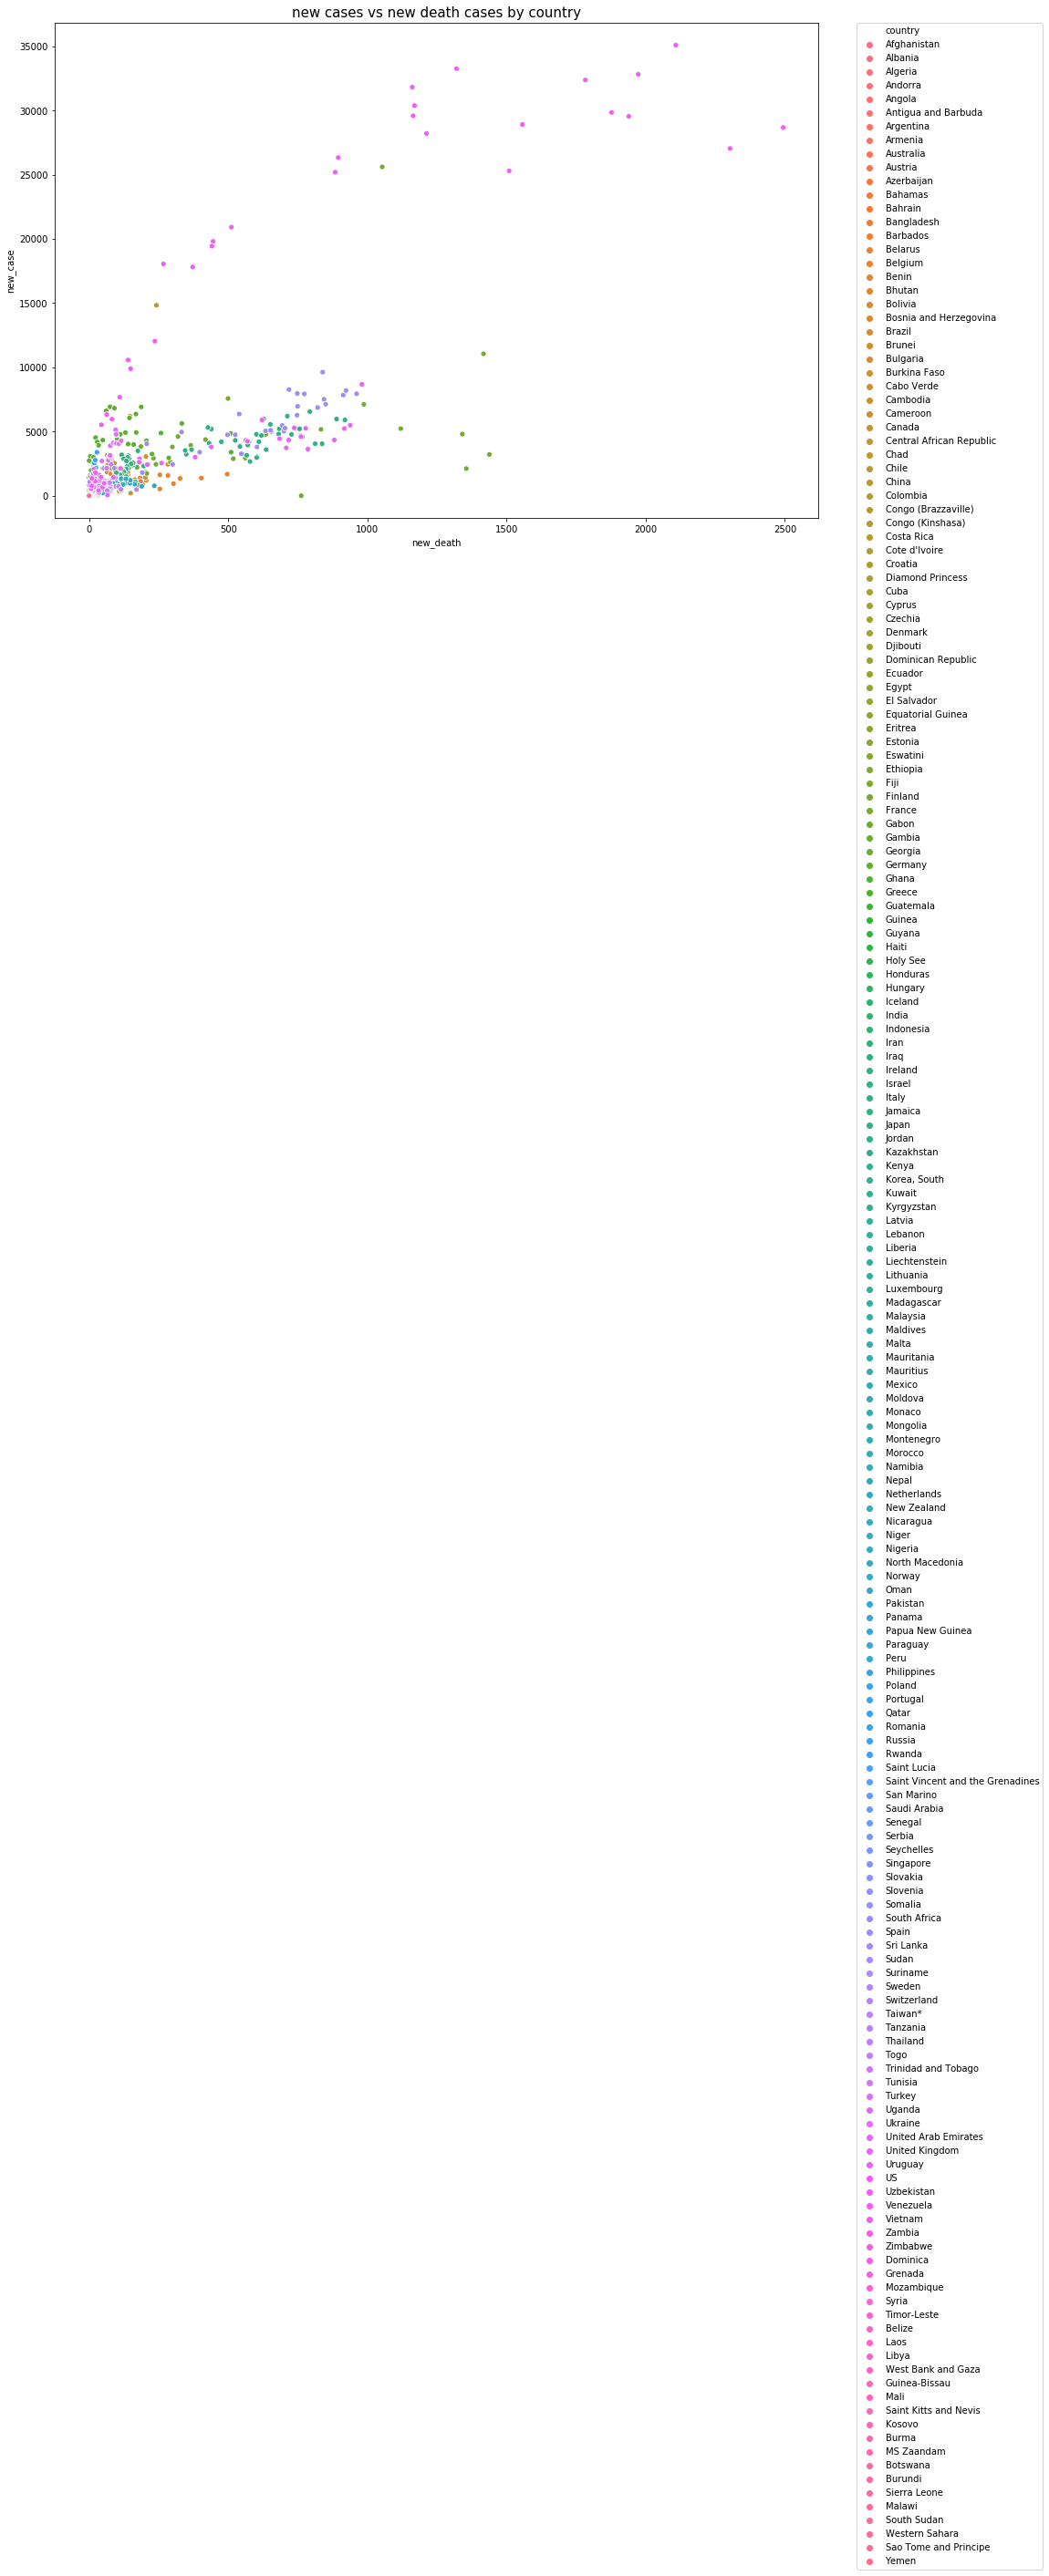

In [43]:
# scatterplot chart about new death cases vs new cases by country
plt.figure(figsize=(15, 10))
g = sns.scatterplot(x='new_death', y='new_case', hue='country', data=data_final)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)     # legend to side, not in chart
g.set_title('new cases vs new death cases by country', fontsize=15)
# That one very high value in right upper corner has been investigated above (location=Hubei, date=2020-02-13)

In [44]:
# 
# lets found out Finland's numbers
#
FIN_data = data_final[(data_final['country'] == 'Finland')]
FIN_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
5981,Finland,NaN,Finland,64.0,26.0,2020-01-29,1,NaN,NaN,NaN,NaN,NaN
5982,Finland,NaN,Finland,64.0,26.0,2020-01-30,1,0.0,NaN,NaN,NaN,NaN
5983,Finland,NaN,Finland,64.0,26.0,2020-01-31,1,0.0,NaN,NaN,NaN,NaN
5984,Finland,NaN,Finland,64.0,26.0,2020-02-01,1,0.0,NaN,NaN,NaN,NaN
5985,Finland,NaN,Finland,64.0,26.0,2020-02-02,1,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6054,Finland,NaN,Finland,64.0,26.0,2020-04-11,2905,136.0,49.0,1.0,300.0,0.0
6055,Finland,NaN,Finland,64.0,26.0,2020-04-12,2974,69.0,56.0,7.0,300.0,0.0
6056,Finland,NaN,Finland,64.0,26.0,2020-04-13,3064,90.0,59.0,3.0,300.0,0.0
6057,Finland,NaN,Finland,64.0,26.0,2020-04-14,3161,97.0,64.0,5.0,300.0,0.0


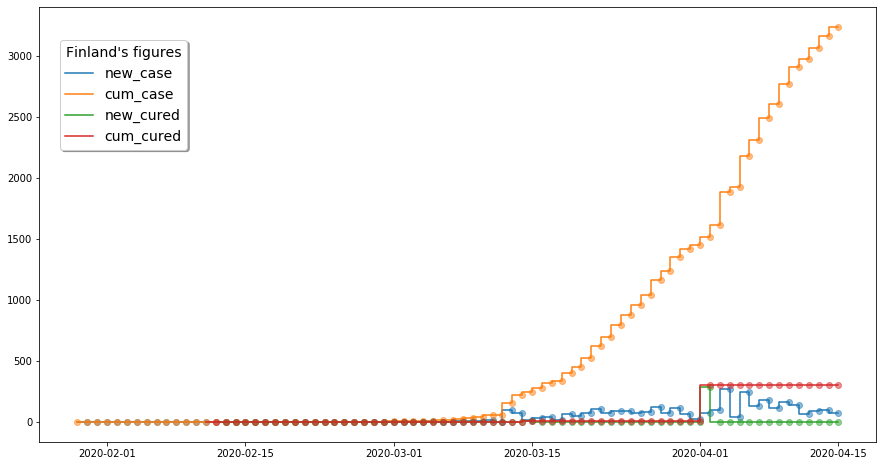

In [72]:
# do Step Demo chart from Finland's numbers
plt.figure(figsize=(15, 8))
plt.step(FIN_data.date, FIN_data.new_case, label='new_case')
plt.plot(FIN_data.date, FIN_data.new_case, 'C0o', alpha=0.5)
plt.step(FIN_data.date, FIN_data.cum_case, label='cum_case')
plt.plot(FIN_data.date, FIN_data.cum_case, 'C1o', alpha=0.5)
plt.step(FIN_data.date, FIN_data.new_cured, label='new_cured')
plt.plot(FIN_data.date, FIN_data.new_cured, 'C2o', alpha=0.5)
plt.step(FIN_data.date, FIN_data.cum_cured, label='cum_cured')
plt.plot(FIN_data.date, FIN_data.cum_cured, 'C3o', alpha=0.5)
plt.legend(title='Finland\'s figures', title_fontsize=14, bbox_to_anchor=(0.19, 0.95), borderaxespad=0.8, fontsize=14, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

In [46]:
# 
# lets found out numbers of Nordic countries: Finland Sweden Norway Denmark Iceland
#
Scan_data = data_final[(data_final['country'] == 'Finland') | (data_final['country'] == 'Sweden') | (data_final['country'] == 'Norway') | (data_final['country'] == 'Denmark') | (data_final['country'] == 'Iceland')]
Scan_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
5445,Faroe Islands,Faroe Islands,Denmark,61.8926,-6.9118,2020-03-04,1,NaN,NaN,NaN,NaN,NaN
5446,Faroe Islands,Faroe Islands,Denmark,61.8926,-6.9118,2020-03-05,1,0.0,NaN,NaN,NaN,NaN
5447,Faroe Islands,Faroe Islands,Denmark,61.8926,-6.9118,2020-03-06,1,0.0,NaN,NaN,NaN,NaN
5448,Faroe Islands,Faroe Islands,Denmark,61.8926,-6.9118,2020-03-07,1,0.0,NaN,NaN,NaN,NaN
5449,Faroe Islands,Faroe Islands,Denmark,61.8926,-6.9118,2020-03-08,2,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10551,Sweden,NaN,Sweden,63.0000,16.0000,2020-04-11,10151,466.0,887.0,17.0,381.0,0.0
10552,Sweden,NaN,Sweden,63.0000,16.0000,2020-04-12,10483,332.0,899.0,12.0,381.0,0.0
10553,Sweden,NaN,Sweden,63.0000,16.0000,2020-04-13,10948,465.0,919.0,20.0,381.0,0.0
10554,Sweden,NaN,Sweden,63.0000,16.0000,2020-04-14,11445,497.0,1033.0,114.0,381.0,0.0


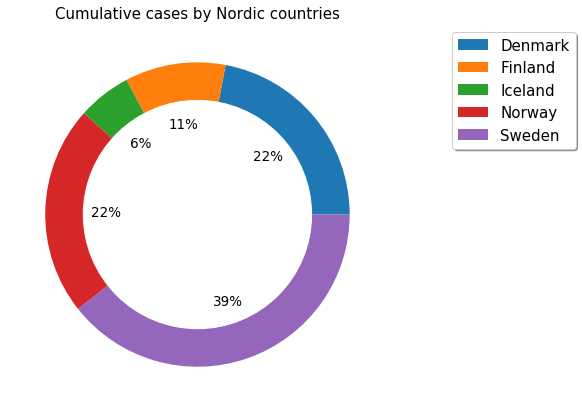

In [47]:
# Recreate donut chart about Nordic countries maximum cumulative cases
Scan_cum_case = Scan_data.groupby('country')
Scan_cum_case = Scan_cum_case[['cum_case']].max()
# Scan_cum_case
# main pie chart
pie_chart = Scan_cum_case.cum_case.plot(kind='pie', figsize=(7, 7), fontsize=(13.5), autopct='%1.0f%%', labels=None)
plt.legend(Scan_cum_case.index, bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15, shadow=True, columnspacing=3.0, fancybox =True)     # legend to side, not in chart
pie_chart.set_title('Cumulative cases by Nordic countries', fontsize=15)
pie_chart.set_ylabel('')
pie_chart.set_xticklabels({'fontsize':15})
# white center pie chart
circle_chart = plt.Circle((0, 0), 0.75, color='white')
pie_chart.add_artist(circle_chart)

In [48]:
# actual cumulative numbers of Nordic countries: Finland Sweden Norway Denmark Iceland
Scan_cum_case

,cum_case
country,
Denmark,6681
Finland,3237
Iceland,1727
Norway,6740
Sweden,11927


Text(0.5, 1.0, 'new death cases vs cumulative death cases by country')

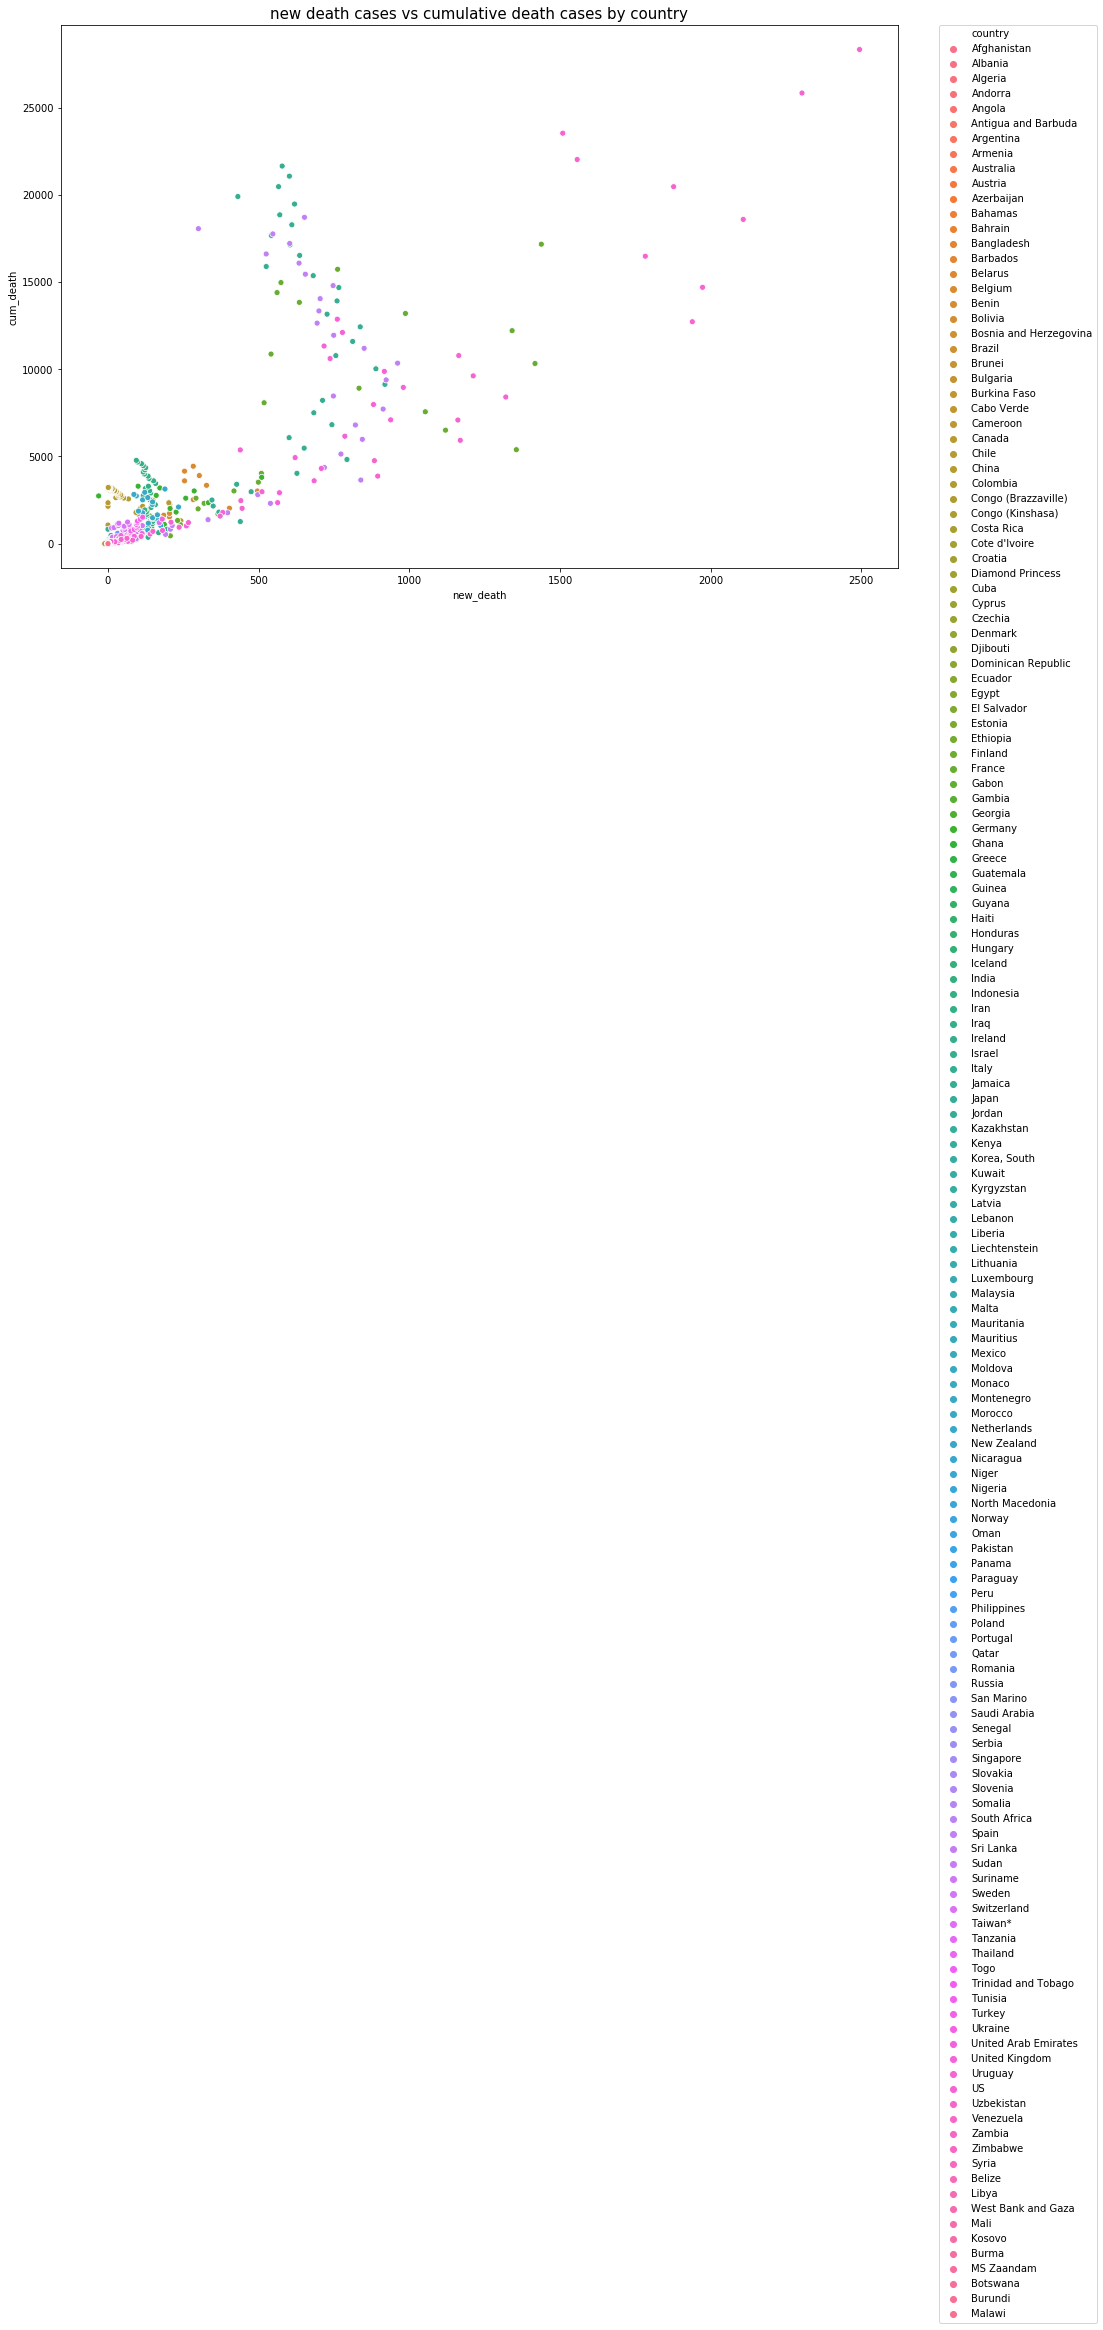

In [49]:
# 
# scatterplot chart about new death case vs cumulative death cases by country
#
plt.figure(figsize=(15, 10))
g = sns.scatterplot(x='new_death', y='cum_death', hue='country', data=data_death)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)     # legend to side, not in chart
g.set_title('new death cases vs cumulative death cases by country', fontsize=15)

Text(0.5, 1.0, 'new cured cases vs cumulative cured cases by country')

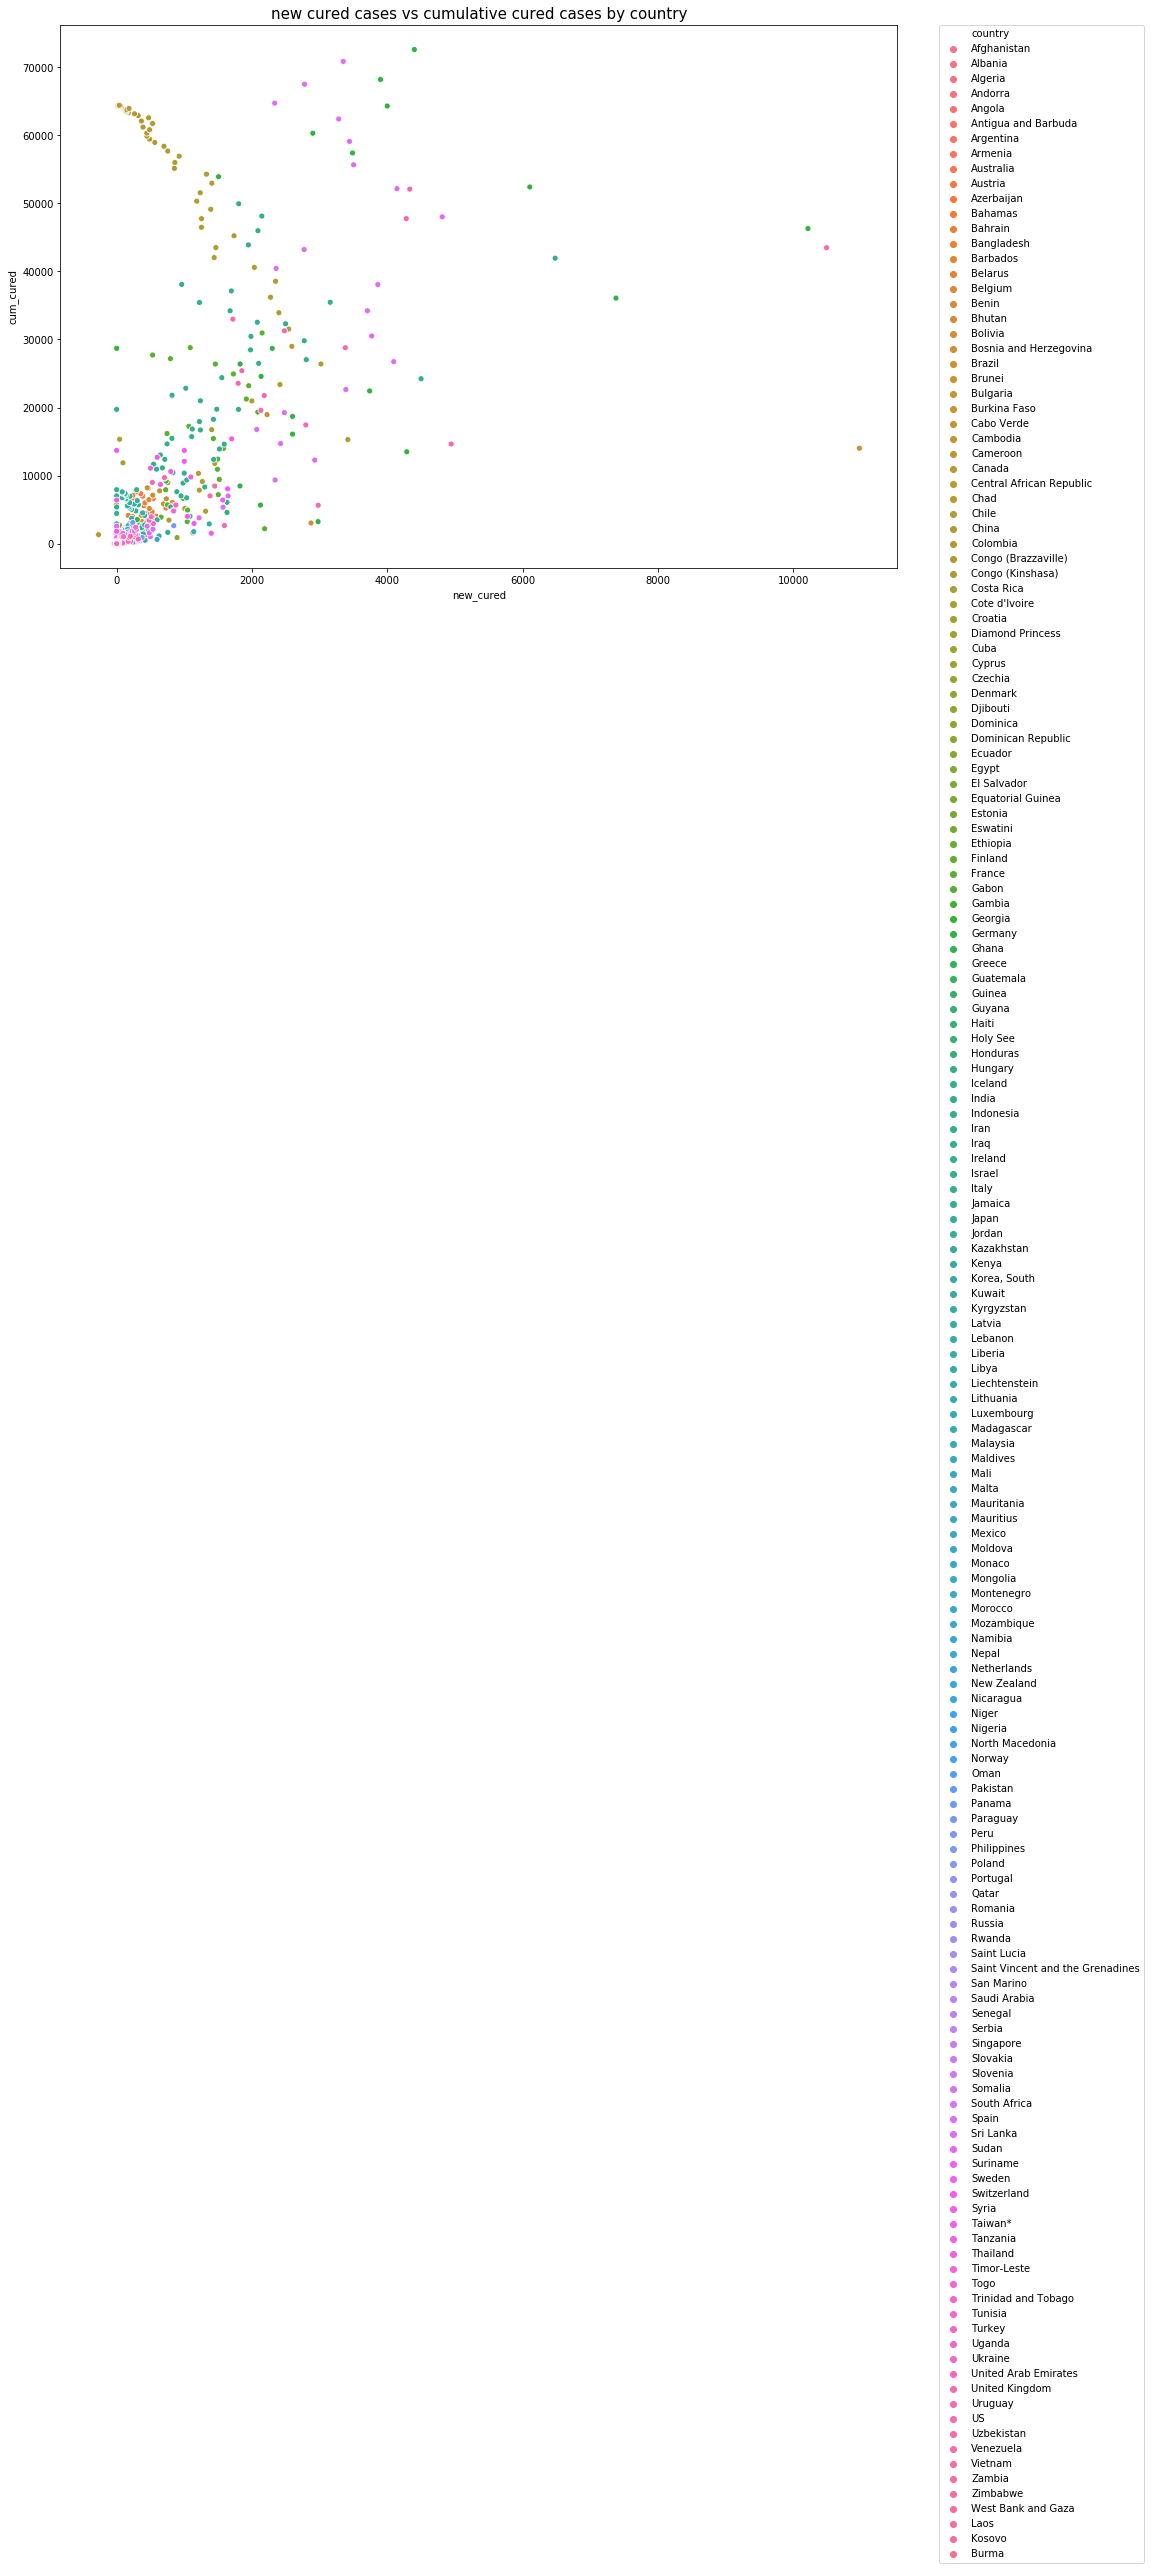

In [50]:
# 
# scatterplot chart about new cured case vs cumulative cured cases by country
#
plt.figure(figsize=(15, 10))
g = sns.scatterplot(x='new_cured', y='cum_cured', hue='country', data=data_cured)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)     # legend to side, not in chart
g.set_title('new cured cases vs cumulative cured cases by country', fontsize=15)

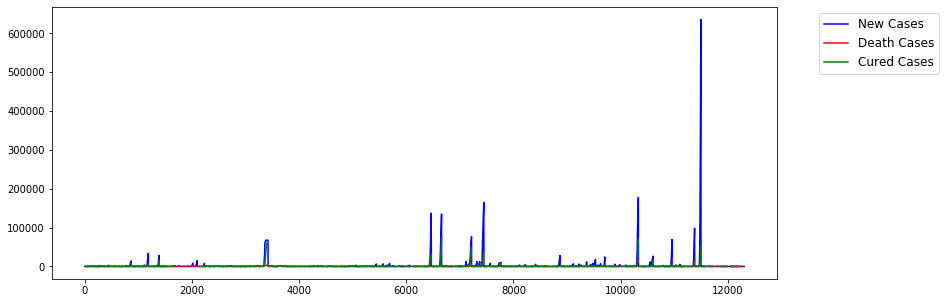

In [51]:
# 
# explore numbers all columns together, first cumulative values and individual values of new_case, new_death, new_cured.
# All these values are by country
#
%matplotlib inline 
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(data_final.cum_case, label='New Cases', color='b')
plt.plot(data_final.cum_death, label='Death Cases', color='r')
plt.plot(data_final.cum_cured, label='Cured Cases', color='g')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5, fontsize=12)     # legend to side, not in chart
plt.show()

In [52]:
#
# US states numbers
#
US_data = data_final[(data_final['country'] == 'US')]
US_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
11416,US,NaN,US,37.0902,-95.7129,2020-01-22,1,NaN,NaN,NaN,NaN,NaN
11417,US,NaN,US,37.0902,-95.7129,2020-01-23,1,0.0,NaN,NaN,NaN,NaN
11418,US,NaN,US,37.0902,-95.7129,2020-01-24,2,1.0,NaN,NaN,NaN,NaN
11419,US,NaN,US,37.0902,-95.7129,2020-01-25,2,0.0,NaN,NaN,NaN,NaN
11420,US,NaN,US,37.0902,-95.7129,2020-01-26,5,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11496,US,NaN,US,37.0902,-95.7129,2020-04-11,526396,29861.0,20463.0,1877.0,31270.0,2480.0
11497,US,NaN,US,37.0902,-95.7129,2020-04-12,555313,28917.0,22020.0,1557.0,32988.0,1718.0
11498,US,NaN,US,37.0902,-95.7129,2020-04-13,580619,25306.0,23529.0,1509.0,43482.0,10494.0
11499,US,NaN,US,37.0902,-95.7129,2020-04-14,607670,27051.0,25832.0,2303.0,47763.0,4281.0


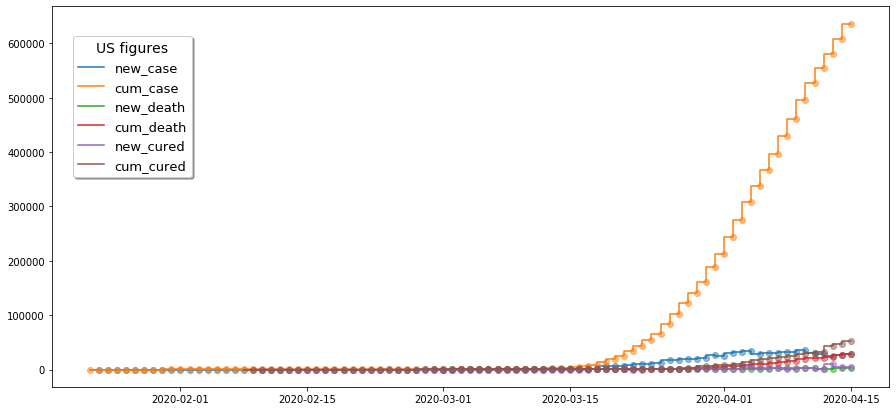

In [53]:
# do Step Demo chart from US's numbers
plt.figure(figsize=(15, 7))
plt.step(US_data.date, US_data.new_case, label='new_case')
plt.plot(US_data.date, US_data.new_case, 'C0o', alpha=0.5)
plt.step(US_data.date, US_data.cum_case, label='cum_case')
plt.plot(US_data.date, US_data.cum_case, 'C1o', alpha=0.5)
plt.step(US_data.date, US_data.new_death, label='new_death')
plt.plot(US_data.date, US_data.new_death, 'C2o', alpha=0.5)
plt.step(US_data.date, US_data.cum_death, label='cum_death')
plt.plot(US_data.date, US_data.cum_death, 'C3o', alpha=0.5)
plt.step(US_data.date, US_data.new_cured, label='new_cured')
plt.plot(US_data.date, US_data.new_cured, 'C4o', alpha=0.5)
plt.step(US_data.date, US_data.cum_cured, label='cum_cured')
plt.plot(US_data.date, US_data.cum_cured, 'C5o', alpha=0.5)
plt.legend(title='US figures', title_fontsize=14, bbox_to_anchor=(0.18, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

In [54]:
# 
# Italy's numbers
#
Italy_data = data_final[(data_final['country'] == 'Italy')]
Italy_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
7373,Italy,NaN,Italy,43.0,12.0,2020-01-31,2,NaN,NaN,NaN,NaN,NaN
7374,Italy,NaN,Italy,43.0,12.0,2020-02-01,2,0.0,NaN,NaN,NaN,NaN
7375,Italy,NaN,Italy,43.0,12.0,2020-02-02,2,0.0,NaN,NaN,NaN,NaN
7376,Italy,NaN,Italy,43.0,12.0,2020-02-03,2,0.0,NaN,NaN,NaN,NaN
7377,Italy,NaN,Italy,43.0,12.0,2020-02-04,2,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7444,Italy,NaN,Italy,43.0,12.0,2020-04-11,152271,4694.0,19468.0,619.0,32534.0,2079.0
7445,Italy,NaN,Italy,43.0,12.0,2020-04-12,156363,4092.0,19899.0,431.0,34211.0,1677.0
7446,Italy,NaN,Italy,43.0,12.0,2020-04-13,159516,3153.0,20465.0,566.0,35435.0,1224.0
7447,Italy,NaN,Italy,43.0,12.0,2020-04-14,162488,2972.0,21067.0,602.0,37130.0,1695.0


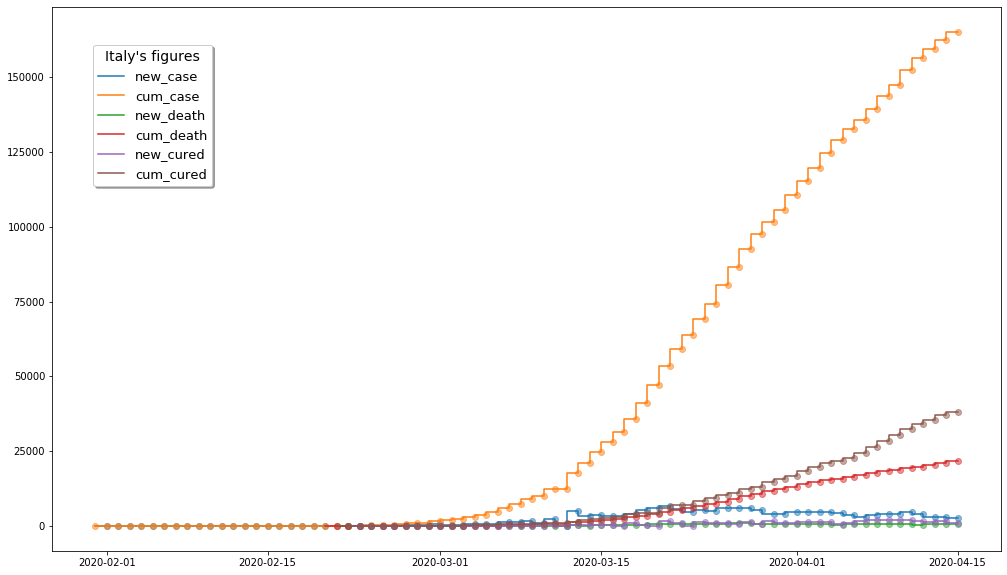

In [55]:
# do Step Demo chart from US's numbers
plt.figure(figsize=(17, 10))
plt.step(Italy_data.date, Italy_data.new_case, label='new_case')
plt.plot(Italy_data.date, Italy_data.new_case, 'C0o', alpha=0.5)
plt.step(Italy_data.date, Italy_data.cum_case, label='cum_case')
plt.plot(Italy_data.date, Italy_data.cum_case, 'C1o', alpha=0.5)
plt.step(Italy_data.date, Italy_data.new_death, label='new_death')
plt.plot(Italy_data.date, Italy_data.new_death, 'C2o', alpha=0.5)
plt.step(Italy_data.date, Italy_data.cum_death, label='cum_death')
plt.plot(Italy_data.date, Italy_data.cum_death, 'C3o', alpha=0.5)
plt.step(Italy_data.date, Italy_data.new_cured, label='new_cured')
plt.plot(Italy_data.date, Italy_data.new_cured, 'C4o', alpha=0.5)
plt.step(Italy_data.date, Italy_data.cum_cured, label='cum_cured')
plt.plot(Italy_data.date, Italy_data.cum_cured, 'C5o', alpha=0.5)
plt.legend(title='Italy\'s figures', title_fontsize=14, bbox_to_anchor=(0.18, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

In [56]:
# 
# Russia's numbers
#
Russia_data = data_final[(data_final['country'] == 'Russia')]
Russia_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
9630,Russia,NaN,Russia,60.0,90.0,2020-01-31,2,NaN,NaN,NaN,NaN,NaN
9631,Russia,NaN,Russia,60.0,90.0,2020-02-01,2,0.0,NaN,NaN,NaN,NaN
9632,Russia,NaN,Russia,60.0,90.0,2020-02-02,2,0.0,NaN,NaN,NaN,NaN
9633,Russia,NaN,Russia,60.0,90.0,2020-02-03,2,0.0,NaN,NaN,NaN,NaN
9634,Russia,NaN,Russia,60.0,90.0,2020-02-04,2,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Russia,NaN,Russia,60.0,90.0,2020-04-11,13584,1667.0,106.0,12.0,1045.0,250.0
9702,Russia,NaN,Russia,60.0,90.0,2020-04-12,15770,2186.0,130.0,24.0,1291.0,246.0
9703,Russia,NaN,Russia,60.0,90.0,2020-04-13,18328,2558.0,148.0,18.0,1470.0,179.0
9704,Russia,NaN,Russia,60.0,90.0,2020-04-14,21102,2774.0,170.0,22.0,1694.0,224.0


C:\Users\katar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\katar\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


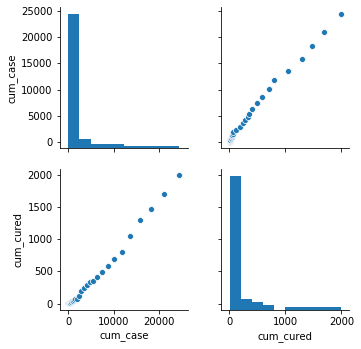

In [57]:
# plt.figure(figsize=(17, 10))
R_chart = sns.pairplot(Russia_data[['cum_case', 'cum_cured']])

In [58]:
# 
# China's numbers
#
China_data = data_final[(data_final['country'] == 'China')]
China_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
2234,Anhui,Anhui,China,31.8257,117.2264,2020-01-22,1,NaN,NaN,NaN,NaN,NaN
2235,Anhui,Anhui,China,31.8257,117.2264,2020-01-23,9,8.0,NaN,NaN,NaN,NaN
2236,Anhui,Anhui,China,31.8257,117.2264,2020-01-24,15,6.0,NaN,NaN,NaN,NaN
2237,Anhui,Anhui,China,31.8257,117.2264,2020-01-25,39,24.0,NaN,NaN,NaN,NaN
2238,Anhui,Anhui,China,31.8257,117.2264,2020-01-26,60,21.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5015,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-11,1267,0.0,1.0,0.0,1236.0,1.0
5016,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-12,1267,0.0,1.0,0.0,1238.0,2.0
5017,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-13,1267,0.0,1.0,0.0,1239.0,1.0
5018,Zhejiang,Zhejiang,China,29.1832,120.0934,2020-04-14,1267,0.0,1.0,0.0,1242.0,3.0


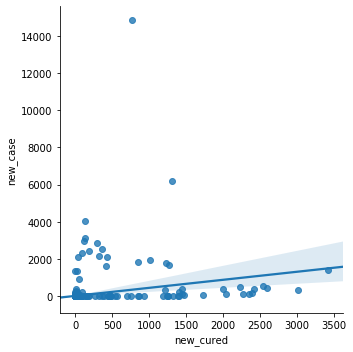

In [59]:
sns.lmplot(y='new_case', x='new_cured', data=China_data)

## Explore numbers by different continents

```
Europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
          'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany',
          'Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
          'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland',
          'Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland',
          'Turkey','Ukraine','United Kingdom','Vatican City']

NorthAmerica = ['Anguillla','Antigua And Barbuda','Aruba','The Bahamas','Barbados','Belize','Bermuda','Bonaire',
             'British Virgin Islands','Canada','Cayman Islands','Clipperton Island','Costa Rica','Cuba','Curacua',
             'Dominica','Dominican Republic','El Salvador','Federal Dependecies of Venezuela','Greenland',
             'Grenada','Guadeloupe','Guatemala','Haiti','Honduras','Martinique','Mexico','Montserrat','Nigaragua',
             'Nueva Esparta','Panama','Puerto Rico','Saba','San Andres and Providencia','Saint Barthelemy',
             'Saint Kitts and Nevis','Saint Lucia','Saint Martin','Saint Pierre and Miquelon',
             'Saint Vincent and the Netherlands','Sint Maarten','Trinidad and Tobago','Turks and Caicos Islands','US']

SouthAmerica= ['Argentina','Bolivia','Bouvet Island','Brazil','Chile','Colombia','Ecuador','Falkland Islands',
           'French Guiana','Guyana','Jamaica','Paraguay','Peru','South Georgia and the South Sandwich Islands',
           'Suriname','Uruguay','Venezuela']

Asia= ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor',
    'India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kuwait','Kyrgystan','Laos','Lebanon','Malaysia',
    'Maldives','Mongolia','Maynmar','Nepal','Korea, North', 'Oman','Pakistan','Palestine',
    'Papua New Guinea','Philippines','Qatar','Saudi Arabia','Singapore','Korea, South',
    'Sri Lanka','Syria','Taiwan*','Tajikistan','Thailand','Turkmenistan','United Arab Emirates','Uzbekistan',
    'Vietnam','Yemen']

Africa= ['Algeria','Burkina Faso','Cameroon','Congo (Kinshasa)','Egypt','Morocco','Nigeria','Reunion','Senegal',
         'South Africa','Togo','Tunisia']

others = ['Cruise Ship','Australia',"Cote d'Ivoire",'Holy See','New Zealand','Reunion']
```

In [60]:
# 
# Europe's numbers for chart
#
Europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina',
          'Bulgaria','Croatia','Cyprus','Czechia','Denmark','Estonia','Finland','France','Georgia','Germany',
          'Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania',
          'Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','North Macedonia','Norway','Poland',
          'Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland',
          'Turkey','Ukraine','United Kingdom','Vatican City']

EU_data = data_final[data_final['country'].isin(Europe)] 
EU_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
52,Albania,NaN,Albania,41.1533,20.1683,2020-03-09,2,NaN,NaN,NaN,NaN,NaN
53,Albania,NaN,Albania,41.1533,20.1683,2020-03-10,10,8.0,NaN,NaN,NaN,NaN
54,Albania,NaN,Albania,41.1533,20.1683,2020-03-11,12,2.0,1.0,NaN,NaN,NaN
55,Albania,NaN,Albania,41.1533,20.1683,2020-03-12,23,11.0,1.0,0.0,NaN,NaN
56,Albania,NaN,Albania,41.1533,20.1683,2020-03-13,33,10.0,1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12267,Saint Pierre and Miquelon,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-04-11,1,0.0,NaN,NaN,NaN,NaN
12268,Saint Pierre and Miquelon,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-04-12,1,0.0,NaN,NaN,NaN,NaN
12269,Saint Pierre and Miquelon,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-04-13,1,0.0,NaN,NaN,NaN,NaN
12270,Saint Pierre and Miquelon,Saint Pierre and Miquelon,France,46.8852,-56.3159,2020-04-14,1,0.0,NaN,NaN,NaN,NaN


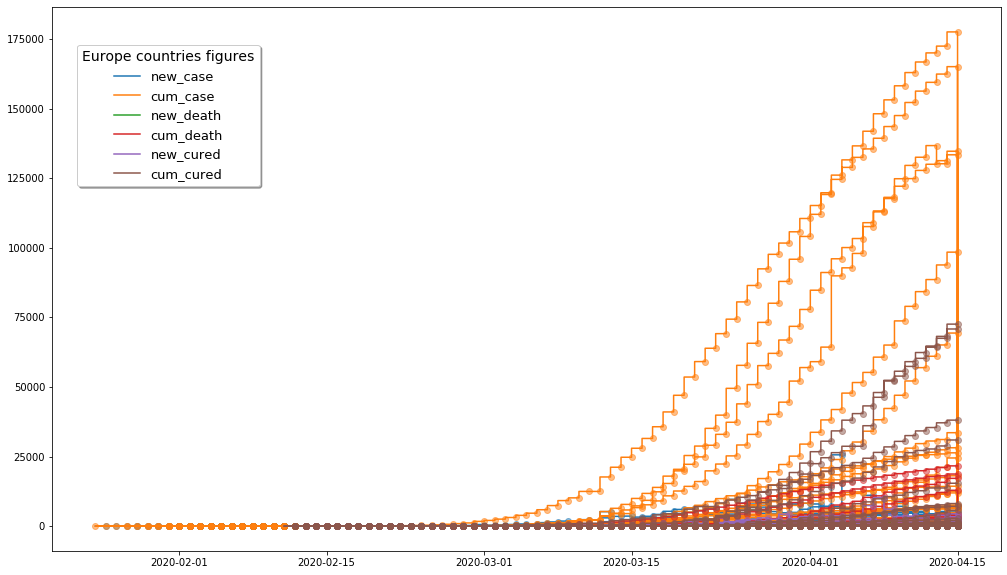

In [61]:
# do Step Demo chart from Europe's numbers
plt.figure(figsize=(17, 10))
plt.step(EU_data.date, EU_data.new_case, label='new_case')
plt.plot(EU_data.date, EU_data.new_case, 'C0o', alpha=0.5)
plt.step(EU_data.date, EU_data.cum_case, label='cum_case')
plt.plot(EU_data.date, EU_data.cum_case, 'C1o', alpha=0.5)
plt.step(EU_data.date, EU_data.new_death, label='new_death')
plt.plot(EU_data.date, EU_data.new_death, 'C2o', alpha=0.5)
plt.step(EU_data.date, EU_data.cum_death, label='cum_death')
plt.plot(EU_data.date, EU_data.cum_death, 'C3o', alpha=0.5)
plt.step(EU_data.date, EU_data.new_cured, label='new_cured')
plt.plot(EU_data.date, EU_data.new_cured, 'C4o', alpha=0.5)
plt.step(EU_data.date, EU_data.cum_cured, label='cum_cured')
plt.plot(EU_data.date, EU_data.cum_cured, 'C5o', alpha=0.5)
plt.legend(title='Europe countries figures', title_fontsize=14, bbox_to_anchor=(0.23, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

In [62]:
# 
# North America's numbers for chart
#
NorthAmerica = ['Anguillla','Antigua And Barbuda','Aruba','The Bahamas','Barbados','Belize','Bermuda','Bonaire',
                     'British Virgin Islands','Canada','Cayman Islands','Clipperton Island','Costa Rica','Cuba','Curacua',
                     'Dominica','Dominican Republic','El Salvador','Federal Dependecies of Venezuela','Greenland',
                     'Grenada','Guadeloupe','Guatemala','Haiti','Honduras','Martinique','Mexico','Montserrat','Nigaragua',
                     'Nueva Esparta','Panama','Puerto Rico','Saba','San Andres and Providencia','Saint Barthelemy',
                     'Saint Kitts and Nevis','Saint Lucia','Saint Martin','Saint Pierre and Miquelon',
                     'Saint Vincent and the Netherlands','Sint Maarten','Trinidad and Tobago','Turks and Caicos Islands','US']
NorthAmerica_data = data_final[data_final['country'].isin(NorthAmerica)] 
NorthAmerica_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
1036,Barbados,NaN,Barbados,13.1939,-59.5432,2020-03-17,2,NaN,NaN,NaN,NaN,NaN
1037,Barbados,NaN,Barbados,13.1939,-59.5432,2020-03-18,2,0.0,NaN,NaN,NaN,NaN
1038,Barbados,NaN,Barbados,13.1939,-59.5432,2020-03-19,5,3.0,NaN,NaN,NaN,NaN
1039,Barbados,NaN,Barbados,13.1939,-59.5432,2020-03-20,5,0.0,NaN,NaN,NaN,NaN
1040,Barbados,NaN,Barbados,13.1939,-59.5432,2020-03-21,6,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Yukon,Yukon,Canada,64.2823,-135.0000,2020-04-11,8,0.0,NaN,NaN,NaN,NaN
12051,Yukon,Yukon,Canada,64.2823,-135.0000,2020-04-12,8,0.0,NaN,NaN,NaN,NaN
12052,Yukon,Yukon,Canada,64.2823,-135.0000,2020-04-13,8,0.0,NaN,NaN,NaN,NaN
12053,Yukon,Yukon,Canada,64.2823,-135.0000,2020-04-14,8,0.0,NaN,NaN,NaN,NaN


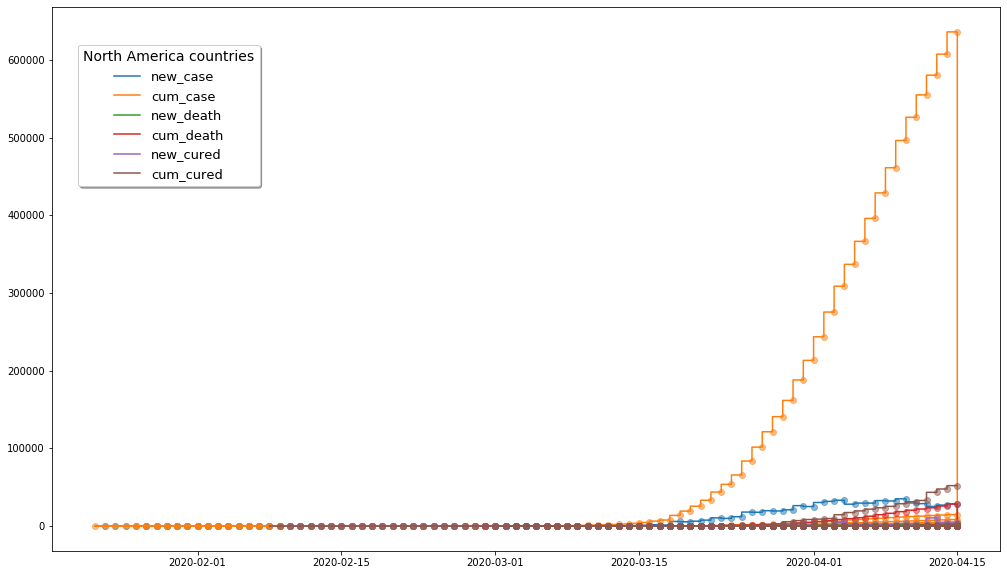

In [63]:
# do Step Demo chart from North America countries
plt.figure(figsize=(17, 10))
plt.step(NorthAmerica_data.date, NorthAmerica_data.new_case, label='new_case')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.new_case, 'C0o', alpha=0.5)
plt.step(NorthAmerica_data.date, NorthAmerica_data.cum_case, label='cum_case')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.cum_case, 'C1o', alpha=0.5)
plt.step(NorthAmerica_data.date, NorthAmerica_data.new_death, label='new_death')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.new_death, 'C2o', alpha=0.5)
plt.step(NorthAmerica_data.date, NorthAmerica_data.cum_death, label='cum_death')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.cum_death, 'C3o', alpha=0.5)
plt.step(NorthAmerica_data.date, NorthAmerica_data.new_cured, label='new_cured')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.new_cured, 'C4o', alpha=0.5)
plt.step(NorthAmerica_data.date, NorthAmerica_data.cum_cured, label='cum_cured')
plt.plot(NorthAmerica_data.date, NorthAmerica_data.cum_cured, 'C5o', alpha=0.5)
plt.legend(title='North America countries', title_fontsize=14, bbox_to_anchor=(0.23, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

In [64]:
# 
# Asia countries' numbers for chart
#
Asia= ['Afghanistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor','India',
       'Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kuwait','Kyrgystan','Laos','Lebanon','Malaysia','Maldives',
       'Mongolia','Maynmar','Nepal','Korea, North', 'Oman','Pakistan','Palestine','Papua New Guinea','Philippines','Qatar',
       'Saudi Arabia','Singapore','Korea, South','Sri Lanka','Syria','Taiwan*','Tajikistan','Thailand','Turkmenistan',
       'United Arab Emirates','Uzbekistan','Vietnam','Yemen']
Asia_data = data_final[data_final['country'].isin(Asia)] 
Asia_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
0,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-24,1,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-25,1,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-26,1,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-27,1,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,Afghanistan,33.000000,65.000000,2020-02-28,1,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12305,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-11,1,0.0,NaN,NaN,NaN,NaN
12306,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-12,1,0.0,NaN,NaN,NaN,NaN
12307,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-13,1,0.0,NaN,NaN,NaN,NaN
12308,Yemen,NaN,Yemen,15.552727,48.516388,2020-04-14,1,0.0,NaN,NaN,NaN,NaN


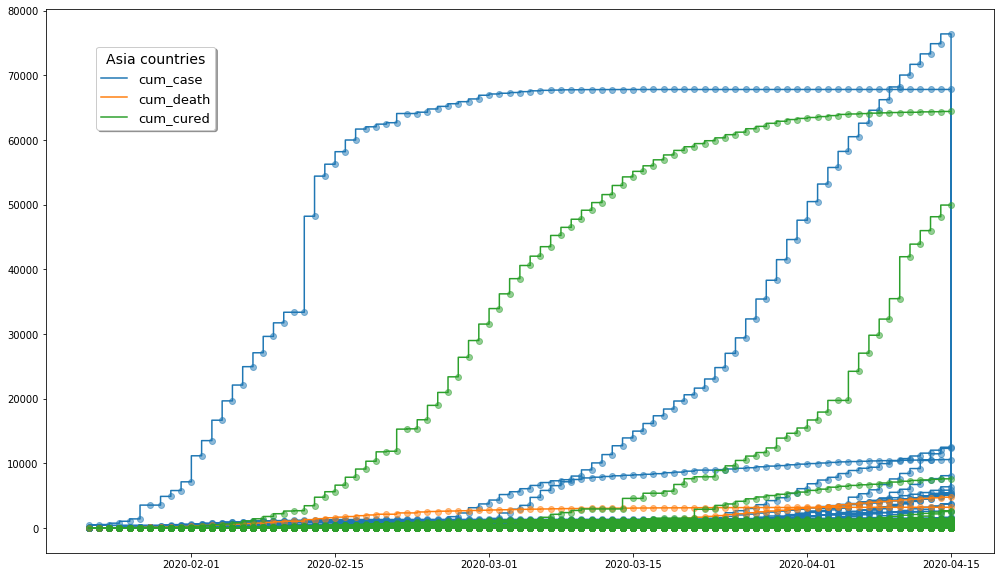

In [65]:
# do Step Demo chart from Asia countries' numbers
plt.figure(figsize=(17, 10))
plt.step(Asia_data.date, Asia_data.cum_case, label='cum_case')
plt.plot(Asia_data.date, Asia_data.cum_case, 'C0o', alpha=0.5)
plt.step(Asia_data.date, Asia_data.cum_death, label='cum_death')
plt.plot(Asia_data.date, Asia_data.cum_death, 'C1o', alpha=0.5)
plt.step(Asia_data.date, Asia_data.cum_cured, label='cum_cured')
plt.plot(Asia_data.date, Asia_data.cum_cured, 'C2o', alpha=0.5)
plt.legend(title='Asia countries', title_fontsize=14, bbox_to_anchor=(0.19, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()

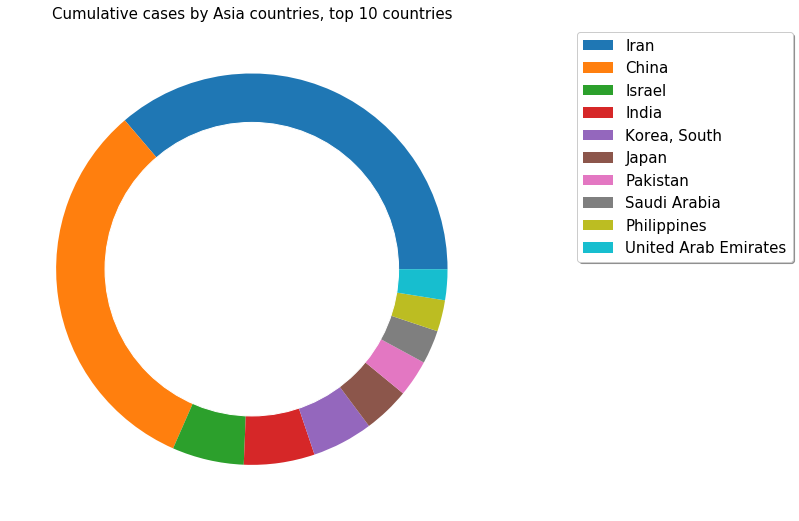

In [66]:
# 
# Asia countries, top 10 countries
#
# Recreate donut chart about South America countries maximum cumulative cases
Asia_cum_case = Asia_data.groupby('country')
Asia_cum_case = Asia_cum_case[['cum_case']].max()
Asia_cum_case = Asia_cum_case.cum_case.sort_values(axis=0, ascending=False).head(10)
Asia_cum_case
# main pie chart
pie_chart = Asia_cum_case.plot(kind='pie', figsize=(9, 9), fontsize=(9.5), labels=None) #autopct='%1.0f%%', 
plt.legend(Asia_cum_case.index, bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15, shadow=True, columnspacing=3.0, fancybox =True)
pie_chart.set_title('Cumulative cases by Asia countries, top 10 countries', fontsize=15)
pie_chart.set_ylabel('')
pie_chart.set_xticklabels({'fontsize':15})
# white center pie chart
circle_chart = plt.Circle((0, 0), 0.75, color='white')
pie_chart.add_artist(circle_chart)

In [67]:
# 
# Africa countries' numbers for chart
#
Africa= ['Algeria','Burkina Faso','Cameroon','Congo (Kinshasa)','Egypt','Morocco','Nigeria','Reunion','Senegal',
         'South Africa','Togo','Tunisia']
Africa_data = data_final[data_final['country'].isin(Africa)] 
Africa_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
90,Algeria,NaN,Algeria,28.0339,1.6596,2020-02-25,1,NaN,NaN,NaN,NaN,NaN
91,Algeria,NaN,Algeria,28.0339,1.6596,2020-02-26,1,0.0,NaN,NaN,NaN,NaN
92,Algeria,NaN,Algeria,28.0339,1.6596,2020-02-27,1,0.0,NaN,NaN,NaN,NaN
93,Algeria,NaN,Algeria,28.0339,1.6596,2020-02-28,1,0.0,NaN,NaN,NaN,NaN
94,Algeria,NaN,Algeria,28.0339,1.6596,2020-02-29,1,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10920,Tunisia,NaN,Tunisia,34.0000,9.0000,2020-04-11,685,14.0,28.0,3.0,43.0,18.0
10921,Tunisia,NaN,Tunisia,34.0000,9.0000,2020-04-12,707,22.0,31.0,3.0,43.0,0.0
10922,Tunisia,NaN,Tunisia,34.0000,9.0000,2020-04-13,726,19.0,34.0,3.0,43.0,0.0
10923,Tunisia,NaN,Tunisia,34.0000,9.0000,2020-04-14,747,21.0,34.0,0.0,43.0,0.0


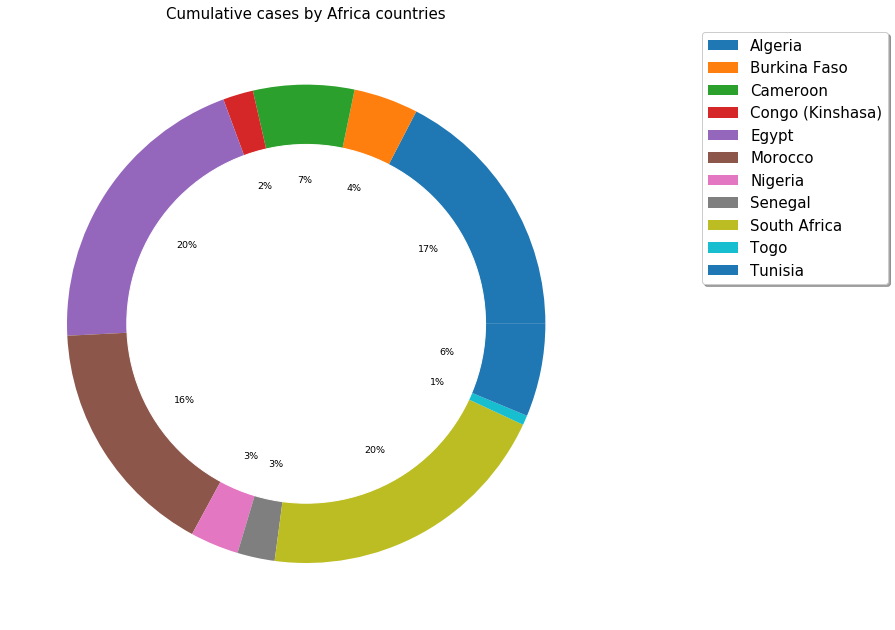

In [68]:
# Africa countries
# Recreate donut chart about Africa countries maximum cumulative cases
Africa_cum_case = Africa_data.groupby('country')
Africa_cum_case = Africa_cum_case[['cum_case']].max()
# main pie chart
pie_chart = Africa_cum_case.cum_case.plot(kind='pie', figsize=(11, 11), autopct='%1.0f%%',fontsize=(9.5), labels=None)
plt.legend(Africa_cum_case.index, bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15, shadow=True, columnspacing=3.0, fancybox =True)
pie_chart.set_title('Cumulative cases by Africa countries', fontsize=15)
pie_chart.set_ylabel('')
pie_chart.set_xticklabels({'fontsize':15})
# white center pie chart
circle_chart = plt.Circle((0, 0), 0.75, color='white')
pie_chart.add_artist(circle_chart)

In [69]:
# 
# other countries' numbers for chart
#
others = ['Australia',"Cote d'Ivoire",'Holy See','New Zealand','Reunion'] # 'Cruise Ship',
others_data = data_final[data_final['country'].isin(others)] 
others_data

,location,prov_state,country,lat,long,date,cum_case,new_case,cum_death,new_death,cum_cured,new_cured
337,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-13,1,NaN,NaN,NaN,NaN,NaN
338,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-14,1,0.0,NaN,NaN,NaN,NaN
339,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-15,1,0.0,NaN,NaN,NaN,NaN
340,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-16,2,1.0,NaN,NaN,NaN,NaN
341,Australian Capital Territory,Australian Capital Territory,Australia,-35.4735,149.0124,2020-03-17,2,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8914,New Zealand,NaN,New Zealand,-40.9006,174.8860,2020-04-11,1312,29.0,4.0,2.0,422.0,49.0
8915,New Zealand,NaN,New Zealand,-40.9006,174.8860,2020-04-12,1330,18.0,4.0,0.0,471.0,49.0
8916,New Zealand,NaN,New Zealand,-40.9006,174.8860,2020-04-13,1349,19.0,5.0,1.0,546.0,75.0
8917,New Zealand,NaN,New Zealand,-40.9006,174.8860,2020-04-14,1366,17.0,9.0,4.0,628.0,82.0


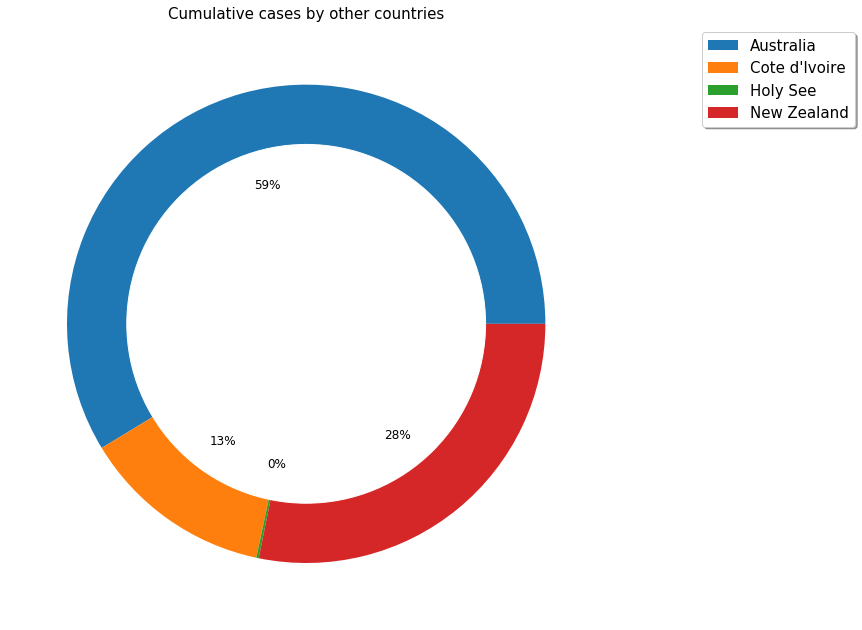

In [70]:
# other countries
# Recreate donut chart about other countries maximum cumulative cases
others_cum_case = others_data.groupby('country')
others_cum_case = others_cum_case[['cum_case']].max()
# main pie chart
pie_chart = others_cum_case.cum_case.plot(kind='pie', figsize=(11, 11), autopct='%1.0f%%',fontsize=(12), labels=None)
plt.legend(others_cum_case.index, bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.5, fontsize=15, shadow=True, columnspacing=3.0, fancybox =True)
pie_chart.set_title('Cumulative cases by other countries', fontsize=15)
pie_chart.set_ylabel('')
pie_chart.set_xticklabels({'fontsize':15})
# white center pie chart
circle_chart = plt.Circle((0, 0), 0.75, color='white')
pie_chart.add_artist(circle_chart)

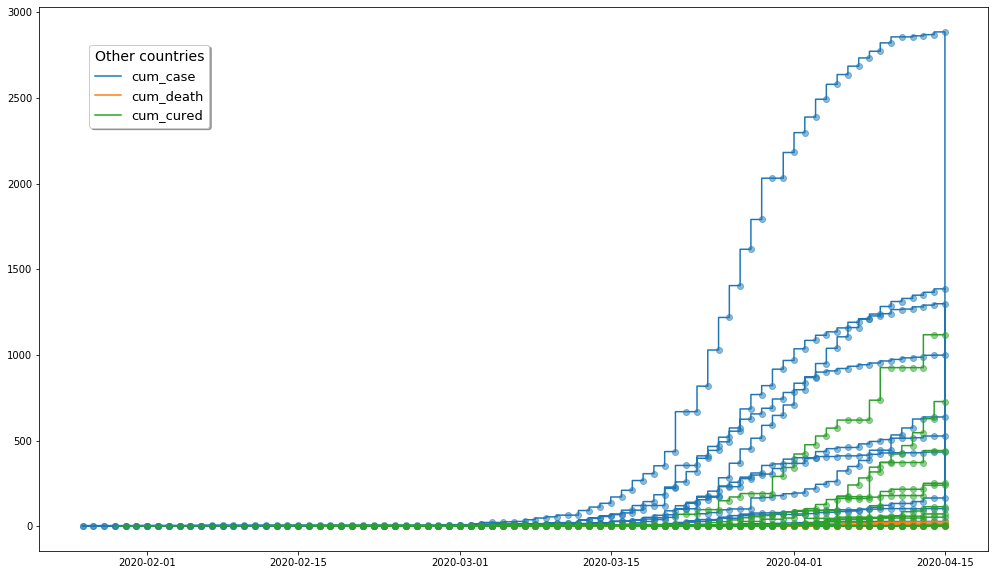

In [71]:
# 
# other countries
#
# do Step Demo chart from Other countries numbers
plt.figure(figsize=(17, 10))
plt.step(others_data.date, others_data.cum_case, label='cum_case')
plt.plot(others_data.date, others_data.cum_case, 'C0o', alpha=0.5)
plt.step(others_data.date, others_data.cum_death, label='cum_death')
plt.plot(others_data.date, others_data.cum_death, 'C1o', alpha=0.5)
plt.step(others_data.date, others_data.cum_cured, label='cum_cured')
plt.plot(others_data.date, others_data.cum_cured, 'C2o', alpha=0.5)
plt.legend(title='Other countries', title_fontsize=14, bbox_to_anchor=(0.19, 0.95), borderaxespad=0.8, fontsize=13, shadow=True, columnspacing=3.0, fancybox =True)
plt.show()